<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/AHMED_BTC_PRICE_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [35]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [36]:
import datetime as dt # Import the datetime module and assign it to the alias 'dt'

start = dt.datetime(2016, 1, 1) # Use the alias 'dt' to access the datetime class within the datetime module
end = dt.datetime.now()

In [37]:
import pandas_datareader as web

In [38]:
!pip install yfinance
import yfinance as yf

crypto_currency = 'BTC'
against_currency = 'USD'

import datetime as dt

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

data = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [39]:
print(data.tail(5))

                    Open          High           Low         Close  \
Date                                                                 
2024-09-16  59185.226562  59205.511719  57501.339844  58192.507812   
2024-09-17  58192.507812  61316.089844  57628.070312  60308.539062   
2024-09-18  60309.000000  61664.066406  59218.253906  61649.679688   
2024-09-19  61651.156250  63872.441406  61609.867188  62940.457031   
2024-09-21  63199.535156  63279.687500  62836.453125  62864.562500   

               Adj Close       Volume  
Date                                   
2024-09-16  58192.507812  32032822113  
2024-09-17  60308.539062  38075570118  
2024-09-18  61649.679688  40990702891  
2024-09-19  62940.457031  42710252573  
2024-09-21  62864.562500  30620469248  


In [40]:

from sklearn.preprocessing import MinMaxScaler

In [41]:
scaller = MinMaxScaler(feature_range=(0,1))
scaled_data = scaller.fit_transform(data['Close'].values.reshape(-1,1))

In [42]:
prediction_days = 90

x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [43]:
import numpy as np

In [44]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [45]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - loss: 0.0296
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0030
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - loss: 0.0032
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - loss: 0.0024
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - loss: 0.0024
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - loss: 0.0021
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - loss: 0.0023
Epoch 8/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - loss: 0.0021
Epoch 9/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - loss: 0.0020
Epoch 10/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - loss: 0.0016
Epoch 11/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - loss: 0.0023
Epoch 12/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - loss: 0.0018
Epoch 13/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - loss: 0.0019
Epoch 14/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - loss: 0.0014
Epoch 15/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [46]:
# prompt: import all libarries for training

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# testing model

In [47]:
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

In [48]:
test_data = yf.download(f'{crypto_currency}-{against_currency}', start=test_start, end=test_end)
actual_prices = test_data['Close'].values

[*********************100%***********************]  1 of 1 completed


In [49]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [50]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaller.transform(model_inputs)

In [51]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

In [52]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
prediction_prices = model.predict(x_test)
prediction_prices = scaller.inverse_transform(prediction_prices)

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step


In [54]:
import matplotlib.pyplot as plt


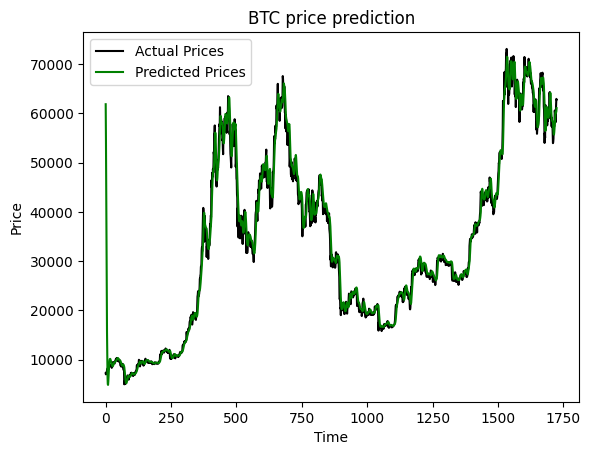

In [55]:
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# predict next day

In [56]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))


In [57]:
prediction = model.predict(real_data)
prediction = scaller.inverse_transform(prediction)
print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step



In [58]:
# prompt: show the predcition of next date

print(f"Prediction for the next day: {prediction[0][0]}")


Prediction for the next day: 61842.9921875
